In [8]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import SGD

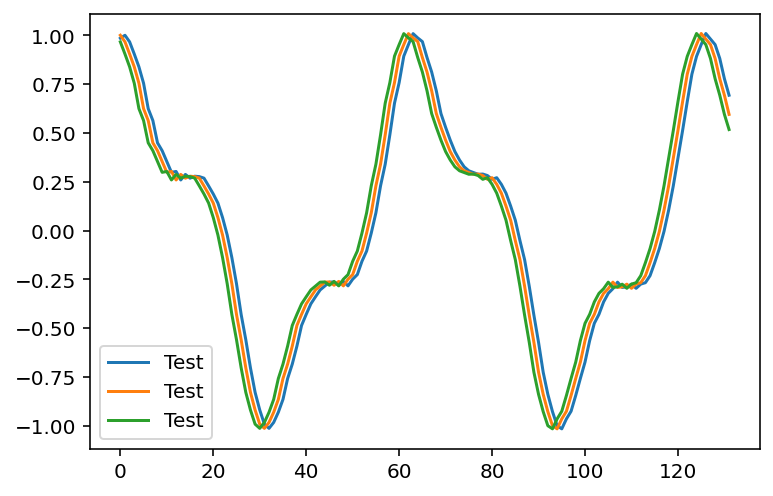

In [9]:
function_to_learn = lambda x: np.sin(x + np.sin(x)**2) + 0.01*np.random.randn(*x.shape)
all_X = np.arange(0, 40, 0.1, 'float')
all_X = [function_to_learn(x) for x in all_X]
all_data_X = np.zeros(shape=(int(len(all_X)-9), 10))
i = 0
for index, elem in enumerate(all_X):
    row_X = all_X[index:10+index]
    if len(row_X) == 10:
        all_data_X[i] = row_X
        i = i + 1

test_X = all_data_X.copy()
test_X = test_X[250:]
test_y = [[x[1], x[2], x[3]] for x in test_X]
test_y = test_y[9:]
test_X = test_X[:-9]

all_X = np.arange(0, 20, 0.005, 'float')
all_X = [function_to_learn(x) for x in all_X]
all_data_X = np.zeros(shape=(int(len(all_X)-9), 10))
i = 0
for index, elem in enumerate(all_X):
    row_X = all_X[index:10+index]
    if len(row_X) == 10:
        all_data_X[i] = row_X
        i = i + 1

all_data_y = [[x[1], x[2], x[3]] for x in all_data_X]
all_data_y = all_data_y[9:]
all_data_X = all_data_X[:-9]

all_data_X, all_data_y = shuffle(all_data_X, all_data_y, random_state=0)

train_size = int(len(all_data_X)*0.75)
X_train = all_data_X[:train_size]
y_train = all_data_y[:train_size]
val_X = all_data_X[train_size:]
val_y = all_data_y[train_size:]

n1 = [x[0] for x in test_y]

plt.plot(test_y, label='Test')
plt.legend()
_ = plt.ylim()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(all_data_X, all_data_y, test_size=0.33)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# model = Sequential()

# model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Dense(15, activation='tanh')) 
# model.add(Dense(50, activation='tanh')) 
# model.add(Dense(3, activation='tanh')) 
# model.add(Dense(3, activation='tanh')) 

# # erro = erro mínimo quadradob
# opt = SGD(learning_rate=0.01, momentum=0.9)
# model.compile(optimizer='adam', loss='mae', metrics=['mse', 'acc'])

# #treinando o modelo
# #epochs = tentativas de aprendizado
# # model.fit(train_X, y_train, epochs=100, batch_size=1)
# history = model.fit(train_X, y_train, epochs=500, batch_size=72, verbose=2, shuffle=False)

In [ ]:
model = Sequential()

model.add(Dense(50, input_dim=10, activation='tanh')) 
model.add(Dense(15, activation='tanh')) 
model.add(Dense(3, activation='tanh')) 
model.add(Dense(3, activation='tanh')) 

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'acc'])

history = model.fit(X_train, y_train, epochs=18, batch_size=1, validation_split=0.2)

Epoch 1/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 2/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 5/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 6/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/18
2133/2133 [==============================] - 3s 1ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/18
2133/2133 [==============================] - 3s 1ms

In [13]:
model = Sequential()

model.add(Dense(20, input_dim=10, activation='tanh')) 
model.add(Dense(15, input_dim=10, activation='tanh')) 
model.add(Dense(10, input_dim=10, activation='tanh')) 
model.add(Dense(5, input_dim=10, activation='tanh')) 
model.add(Dense(5, input_dim=10, activation='tanh'))
model.add(Dense(5, input_dim=10, activation='tanh'))
model.add(Dense(3, input_dim=10, activation='tanh')) 
model.add(Dense(3, input_dim=10, activation='tanh')) 

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
214/214 [==============================] - 1s 2ms/step - loss: 0.0964 - mse: 0.0964 - acc: 0.3427 - val_loss: 0.0314 - val_mse: 0.0314 - val_acc: 0.3146
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 0.0167 - acc: 0.3277 - val_loss: 0.0100 - val_mse: 0.0100 - val_acc: 0.2996
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074 - acc: 0.2986 - val_loss: 0.0071 - val_mse: 0.0071 - val_acc: 0.2846
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044 - acc: 0.3047 - val_loss: 0.0038 - val_mse: 0.0038 - val_acc: 0.2996
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 0.0030 - mse: 0.0030 - acc: 0.3160 - val_loss: 0.0030 - val_mse: 0.0030 - val_acc: 0.3052
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024 - acc: 0.3169 - val_loss: 0.0024 - val_mse: 0.0024 - val_acc: 0.3296
Epoch 7/50
214/2

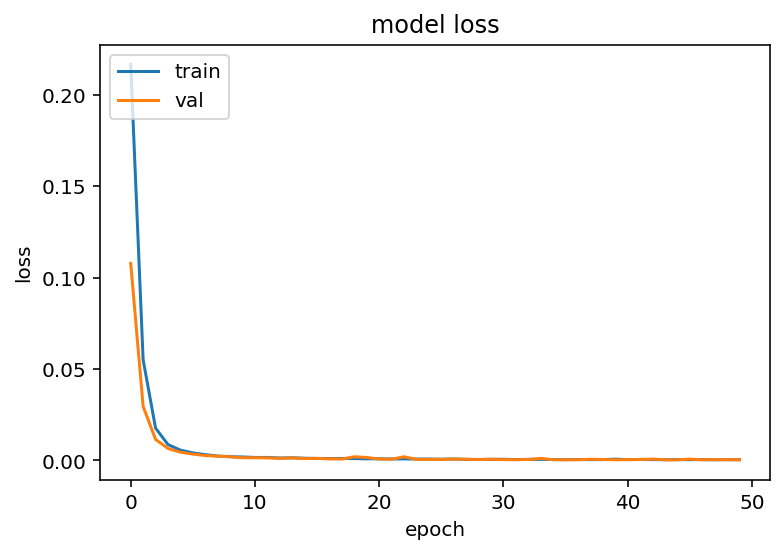

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
pred_train = model.predict(X_train)
pred_test = model.predict(test_X)

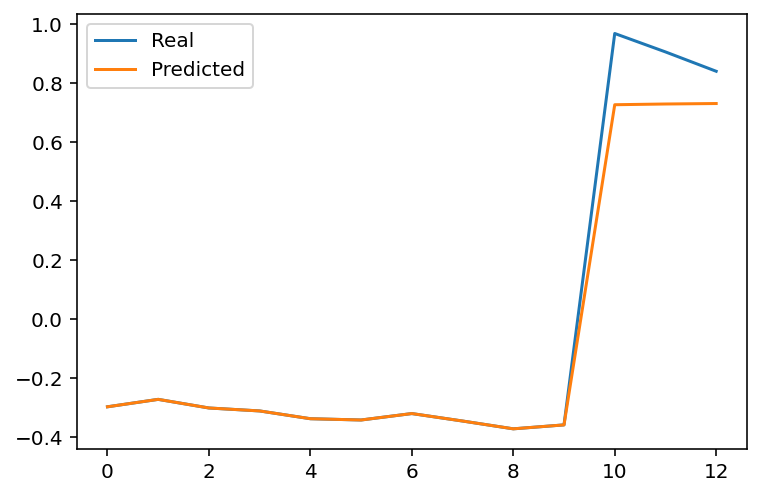

In [32]:
plt.plot(np.concatenate([X_test[2], test_y[2]]), label='Real')
plt.plot(np.concatenate([X_test[2], pred_test[2]]), label='Predicted')

plt.legend()
_ = plt.ylim()

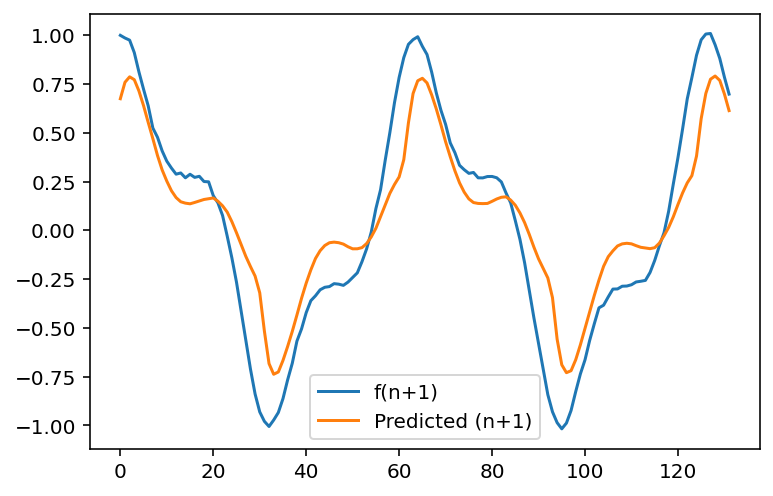

In [ ]:
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
  results['actual'].append(test_y[i][0])
  results['predicted'].append(pred_test[i][0])
 
plt.plot(results['actual'], label='f(n+1)')
plt.plot(results['predicted'], label='Predicted (n+1)')
plt.legend()
_ = plt.ylim()

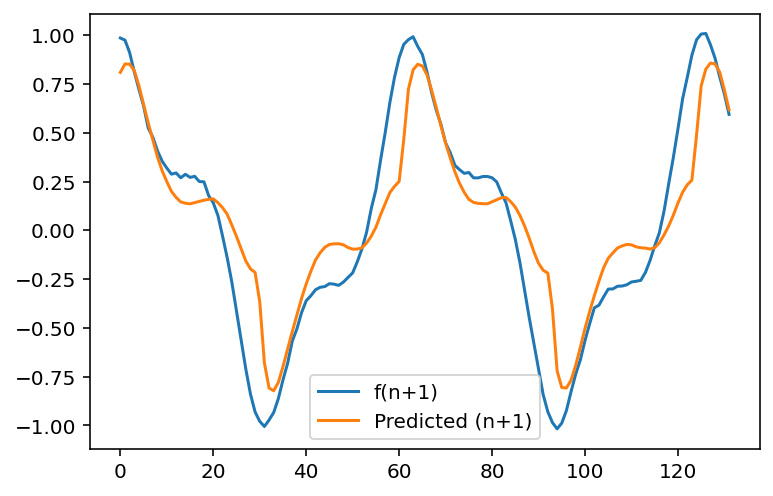

In [ ]:
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
  results['actual'].append(test_y[i][1])
  results['predicted'].append(pred_test[i][1])
 
plt.plot(results['actual'], label='f(n+2)')
plt.plot(results['predicted'], label='Predicted (n+2)')
plt.legend()
_ = plt.ylim()

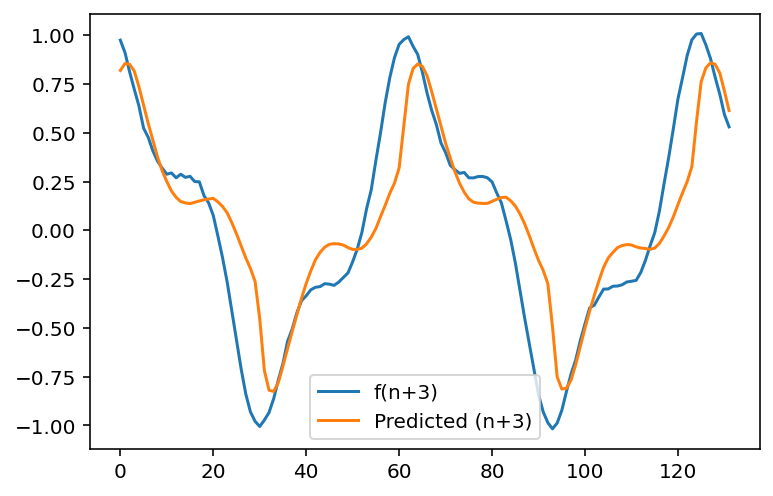

In [ ]:
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
  results['actual'].append(test_y[i][2])
  results['predicted'].append(pred_test[i][2])
 
plt.plot(results['actual'], label='f(n+3)')
plt.plot(results['predicted'], label='Predicted (n+3)')
plt.legend()
_ = plt.ylim()